<a href="https://colab.research.google.com/github/NayanDharviya/Netflix_Case_Study_Analysis/blob/main/Netflix_Case_Study_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
data = pd.read_csv('netflix.csv')
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [56]:
data.shape

(8807, 12)

In [57]:
#### there are total 8807 rows and 12 parameter present in the given data

In [58]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [59]:
# Check Type of Data available
data.info()

# there are only 1 column with numeric value reain all are of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [60]:
data['country'].unique()
# as we can see there are some values are club together, we have to remove this kind of situation to analyse every data individually

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [61]:
data['director'].unique()
# so same as country column we have 2-other columns ['Director','Cast'] columns which have clubbed values in a row
# we have to unnest this all data

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [62]:
data['rating'].value_counts()
# if we observe there is some value which is not matching the rating value
# let's check the records

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [63]:
df=data[data['rating'].isin(['74 min','84 min','66 min'])]
df.head()
# here the value of the duration is replaced with rating columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [64]:
df.loc[df['rating'].isin(['74 min','84 min','66 min']),['rating','duration']] = df.loc[df['rating'].isin(['74 min','84 min','66 min']),['duration', 'rating']].values

In [65]:
# let's replace the row where we made changes in the inappropriate values of rating over duration
data.loc[data.show_id.isin(df.show_id), ['rating', 'duration']] = df[['rating', 'duration']]

In [66]:
## Unnesting the data
# for unnesting we have to convert all values into list of elements and here the clubbed values are seprated by ', '

netflix_unnest = data.copy()
netflix_unnest['director'] = [str(i).split(', ') for i in netflix_unnest['director']]
netflix_unnest['cast'] = [str(i).split(', ') for i in netflix_unnest['cast']]
netflix_unnest['country'] = [str(i).split(', ') for i in netflix_unnest['country']]

In [67]:
netflix_unnest.head(2) ## all values of required column to unnest are converted to list of elements

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[nan],[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[nan],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [68]:
netflix_unnest.shape

(8807, 12)

In [69]:
# let's do final step to seprate all rows, i.e. create number of rows as much clubbed value in a list
# by using EXPLODE function
# defination:- Transform each element of a list-like to a row, replicating index values.
# syntax :- DataFrame.explode(column, ignore_index=False)

In [70]:
netflix_unnest = netflix_unnest.explode('cast')
netflix_unnest = netflix_unnest.explode('director')
netflix_unnest = netflix_unnest.explode('country')

netflix_unnest.shape
 # before unnesting the data has 8807 rows and after unnesting the data rows are increased and data has 89382 rows

(89382, 12)

In [71]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [72]:
# let's check for another features
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

<Axes: >

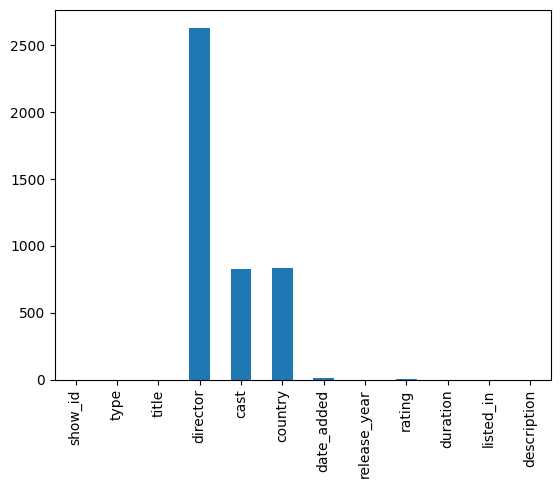

In [73]:
data.isna().sum()
data.isna().sum().plot(kind='bar')

In [74]:
# 1. there are 2634 null values in director columns, 825 in cast and 831 in country columns
# 2. the all the columns which have null values are of the type OBJECT(String), so we cant use mean, max or any statistical method to replace null values

# let's first try to replace director null value by there country and type of the show


In [75]:
netflix_unnest['director'].replace('nan', pd.NA, inplace=True)

In [76]:
netflix_unnest.isna().sum()

show_id             0
type                0
title               0
director        21937
cast                0
country             0
date_added         69
release_year        0
rating             41
duration            0
listed_in           0
description         0
dtype: int64

In [77]:
netflix_unnest.shape

(89382, 12)

In [78]:
netflix_unnest.isna().sum()

show_id             0
type                0
title               0
director        21937
cast                0
country             0
date_added         69
release_year        0
rating             41
duration            0
listed_in           0
description         0
dtype: int64

In [81]:
## droping all rows where director is NA to get a group by country & type - director mode value
netflix_withoutNAdirector = netflix_unnest.dropna(subset = ['director'])

In [82]:
netflix_withoutNAdirector.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Samuel Jouy,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Nabiha Akkari,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [83]:
most_common_director_df = netflix_withoutNAdirector.groupby(['country','type'])['director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA).reset_index()
most_common_director_df = most_common_director_df.reset_index(drop=True)
most_common_director_df.columns = ['country','type','mode_director']

In [84]:
most_common_director_df.head()

,country,type,mode_director
0,,Movie,Najwa Najjar
1,Afghanistan,Movie,Pieter-Jan De Pue
2,Albania,Movie,Antonio Morabito
3,Algeria,Movie,Youssef Chahine
4,Angola,Movie,Chris Roland


In [85]:
NA_director = netflix_unnest[netflix_unnest['director'].isna()]
NA_director= NA_director.reset_index(drop=True)
NA_director


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,<NA>,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,<NA>,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,<NA>,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,<NA>,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,<NA>,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
21932,s8801,TV Show,Zindagi Gulzar Hai,<NA>,Samina Peerzada,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
21933,s8801,TV Show,Zindagi Gulzar Hai,<NA>,Waseem Abbas,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
21934,s8801,TV Show,Zindagi Gulzar Hai,<NA>,Javed Sheikh,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
21935,s8801,TV Show,Zindagi Gulzar Hai,<NA>,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [86]:
merged_df = NA_director.merge(most_common_director_df, on=['country','type'],how='left')

In [87]:
NA_director['director'].fillna(merged_df['mode_director'],inplace=True)

In [88]:
netflix_new = pd.concat([netflix_withoutNAdirector, NA_director])

In [89]:
netflix_new.head().sort_values('show_id')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Samuel Jouy,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Nabiha Akkari,nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [90]:
netflix_new.isna().sum()

show_id           0
type              0
title             0
director        917
cast              0
country           0
date_added       69
release_year      0
rating           41
duration          0
listed_in         0
description       0
dtype: int64

In [91]:
# # a. How has the number of movies released per year changed over the last 20-30 years?
# year_bin = [1920, 1930, 1940, 1950, 1960, 1970,1980, 1990, 2000, 2010, 2020, 2022, ]
# movie_release_year =pd.cut(data['release_year'], year_bin)

In [92]:
max_year = netflix_new['release_year'].max()
min_year = netflix_new['release_year'].min()
max_year, min_year

# The tv-shows and movies data is present from the year 1925 - 2021

(2021, 1925)

In [93]:
netflix_new.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


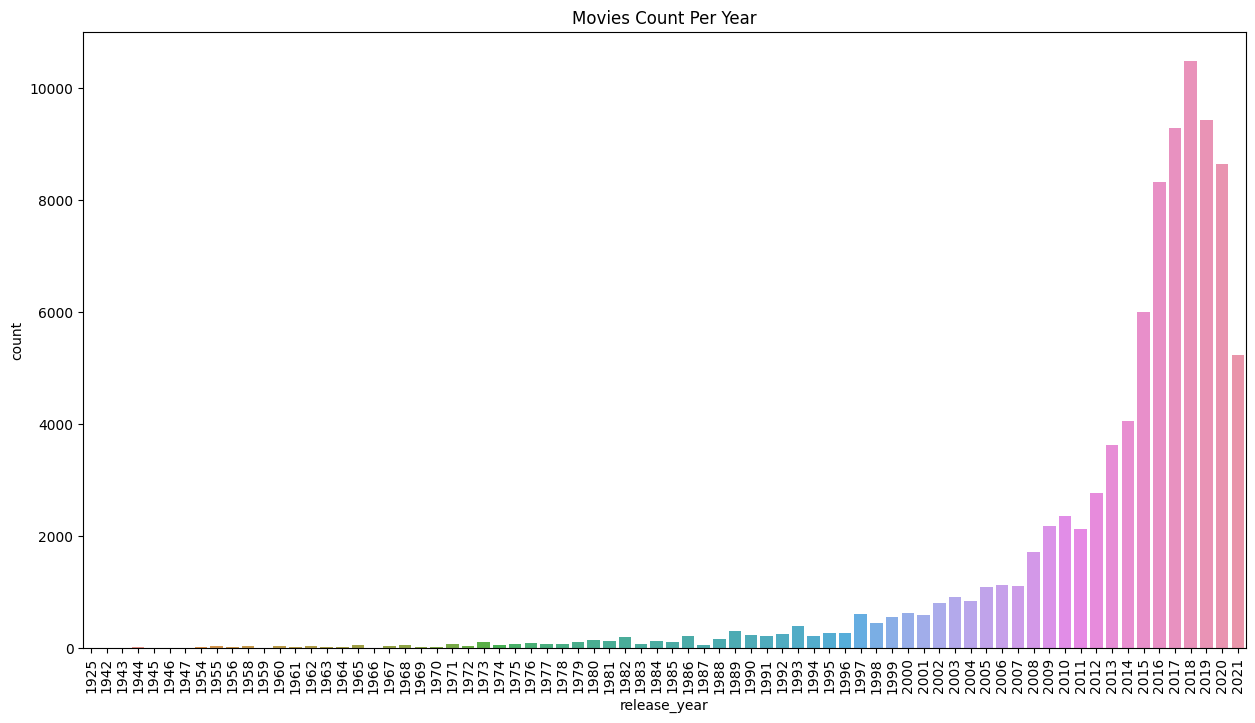

In [94]:
# How has the number of movies released per year changed over the last 20-30 years?

plt.figure(figsize=(15,8))
ax = sns.countplot(data=netflix_new[netflix_new['type']=='Movie'], x= netflix_new['release_year'])
# bar_value = netflix_new['release_year'].value_counts().values
# ax.bar_label(container=ax.containers[0], labels=bar_value)
plt.xticks(rotation=90)
plt.title('Movies Count Per Year')
plt.show()


# observation:- Since over the last 20-30 years the movies releasing are drastically increased and in the year 2018 there is highest release movie count

In [95]:
netflix_new.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [96]:
netflix_new['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

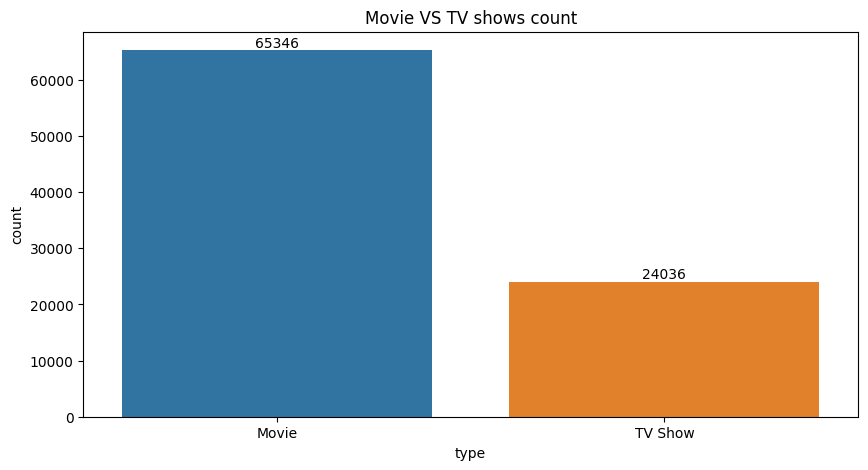

In [97]:
# # Comparison of tv shows vs. movies

# tv_shows = netflix_new[netflix_new['type'] =='TV Show']
# movies = netflix_new[netflix_new['type'] =='Movie']
plt.figure(figsize=(10,5))

ax = sns.countplot(x='type',data=netflix_new)
for label in ax.containers:
    ax.bar_label(label)

plt.title("Movie VS TV shows count")
plt.show()

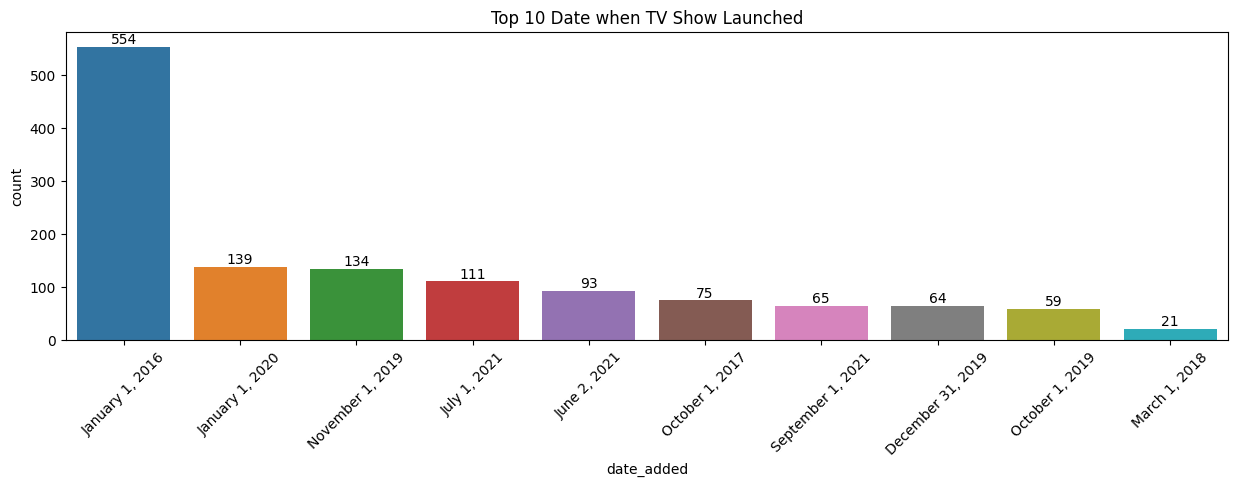

In [98]:
# What is the best time to launch a TV show?

top_10_date_tv_show_launch = netflix_new['date_added'].value_counts().index[:10]
top_10_date_tv_show_launch_df = netflix_new[netflix_new['date_added'].isin(top_10_date_tv_show_launch) & (netflix_new['type'] == 'TV Show')]

plt.figure(figsize=(15,4))
ax = sns.countplot(x = 'date_added',data = top_10_date_tv_show_launch_df, order = top_10_date_tv_show_launch_df['date_added'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Top 10 Date when TV Show Launched')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

## observation:- The best time to launch a TV show is in the strating and ending of the month i.e between 31-4 date

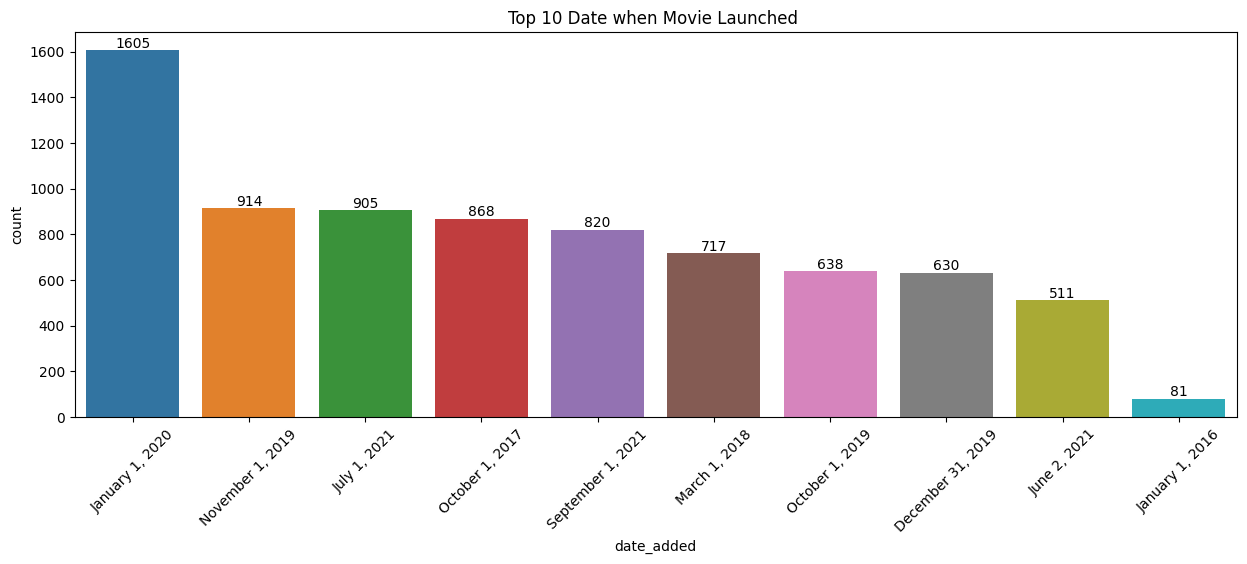

In [99]:
# What is the best time to launch a Movie?

top_10_date_movie_launch = netflix_new['date_added'].value_counts().index[:10]
top_10_date_movie_launch_df = netflix_new[netflix_new['date_added'].isin(top_10_date_movie_launch) & (netflix_new['type'] == 'Movie')]

plt.figure(figsize=(15,5))
ax = sns.countplot(x = 'date_added',data = top_10_date_movie_launch_df, order = top_10_date_movie_launch_df['date_added'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Top 10 Date when Movie Launched ')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

## observation:- The best time to launch a Movies is in the strating and ending of the month i.e between 31-4 date

In [ ]:
# # Analysis of actors/directors of different types of shows/movies.

# df2 = netflix_new.groupby(['director','type'])['title', 'director','type'].count()

# df2.index.values

In [ ]:
# a = netflix_new['release_year'].unique()
# sorted(a)

# netflix_new['release_year'].drop_duplicates().sort_values()
netflix_new['release_year'].drop_duplicates().sort_values(ascending=False).values[:10]


array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012],
      dtype=int64)

<AxesSubplot:xlabel='release_year', ylabel='count'>

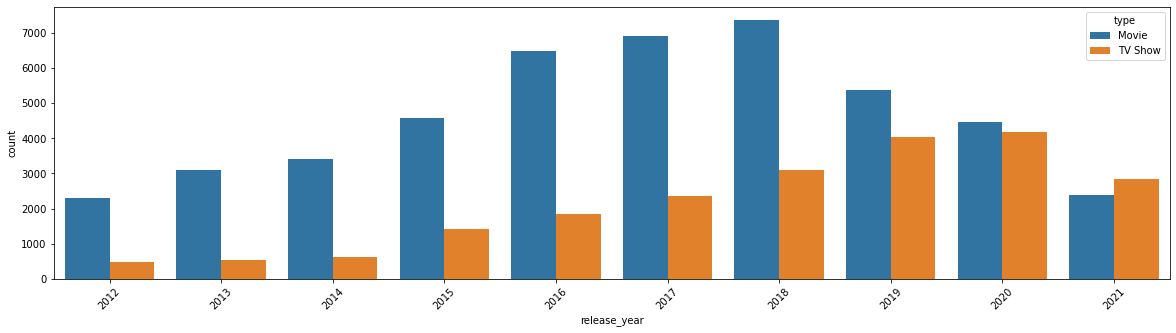

In [ ]:
# Does Netflix has more focus on TV Shows than movies in recent years

recent_10_years = netflix_new['release_year'].drop_duplicates().sort_values(ascending=False).values[:10]

plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(data = netflix_new[netflix_new['release_year'].isin(recent_10_years)], x ='release_year', hue='type')

## observation:- The answer is yes, Netflix is more focus on TV shows than movies in recent years

In [ ]:
# how the distribution of what rating of movies are

netflix_new.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


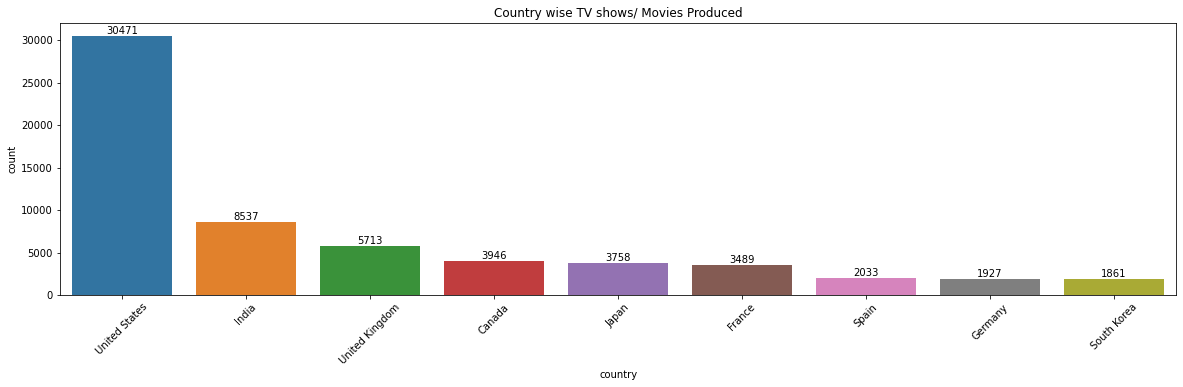

In [ ]:
top_movie_produced = netflix_new['country'].value_counts().index[:10]
top_movie_produced = netflix_new[netflix_new['country'].isin(top_movie_produced)]
top_movie_produced = top_movie_produced[top_movie_produced['country']!='nan']
top_movie_produced['country'].unique()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='country', data=top_movie_produced, order=top_movie_produced['country'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Country wise TV shows/ Movies Produced')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

## observation:- the highest number of movies are produced in US & india

In [ ]:
df2 = netflix_new[netflix_new['type']=='Movie']
top_10_director = df2['director'].value_counts().index[:10]
df2 = df2[df2['director'].isin(top_10_director)]
df2.shape

(2099, 12)

Text(0.5, 1.0, 'Movies produced by director')

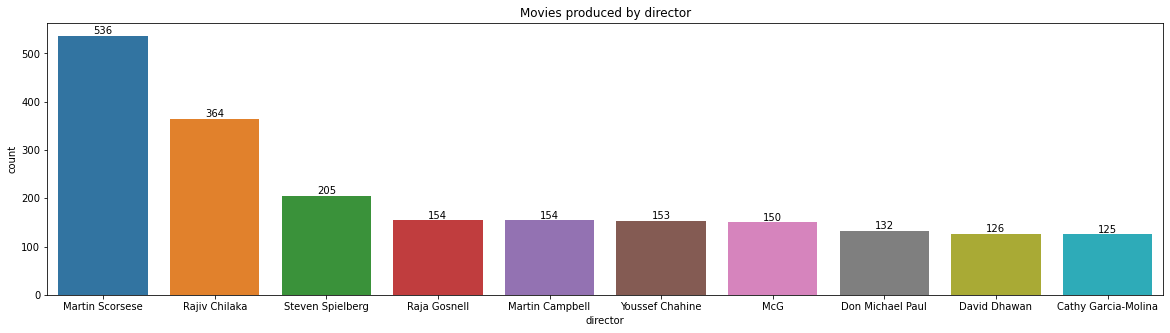

In [ ]:
# which director has produced more movies
plt.figure(figsize=(20,5))
ax = sns.countplot(x = 'director', data = df2, order = df2['director'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Movies produced by director')

# observation :- Martin Scorsese has produced highest number of Movies

Text(0.5, 1.0, 'TV shows produced by director')

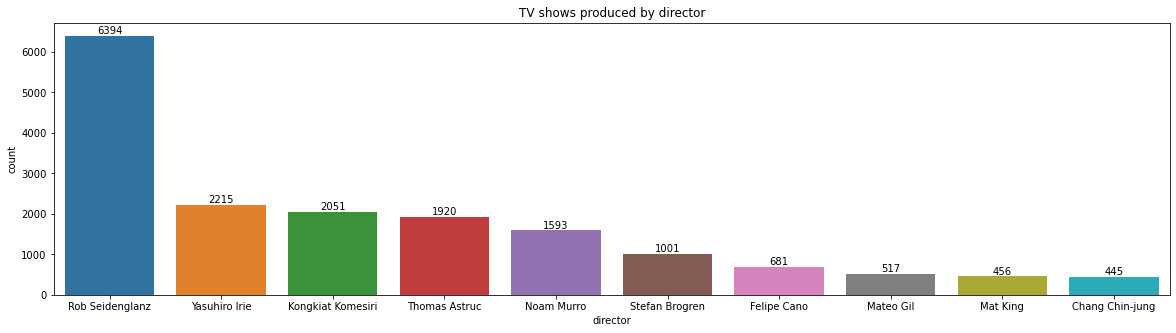

In [ ]:
# which director has produced more TV shows
df3 = netflix_new[netflix_new['type']=='TV Show']
top_10_director = df3['director'].value_counts().index[:10]
df3 = df3[df3['director'].isin(top_10_director)]
df3.shape

plt.figure(figsize=(20,5))
ax = sns.countplot(x = 'director', data = df3, order = df3['director'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title('TV shows produced by director')


# observation :- rob seidengianz has produced highest number of TV shows

In [ ]:
netflix_new.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
# Bussiness Insights:
#     1. More number of movies are produced in US and India country, which means the popularity for the movies and tv shows are more from india and US
#     2. Since the last few years the number of producing TV shows and movies are increase have to focus on the content of the movies are liked by use where more number of content is published
#

In [ ]:
# Recommandation:
#     1. Have to Post the TV shows/Movies of the director who has produced more
#     2. Have to focus on the content where people of the region have more intersted. like in india(hindi), US etc.
#     3. have to focus on date while posting the tv show/movie because most of the content are publishing on start of the month only.
#     4. focus on producing TV shows also as there are amount of increasing in past few years
#     5. invest more on the content public likes the more
#     6. focus on global explansion and localization
#     7. explore new revenue scheme
#     8. work on talent management
#     9. do not forgot for data security and privacy